In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

<h1>1. Eval Plots for without criteria</h1>

In [2]:
file_name = "evaluationreport_all_llms.xlsx" # path to file + file name
sheet =  "Summary" # sheet name or sheet number or list of sheet numbers and names

totalelements_df = pd.read_excel(file_name, sheet_name=sheet)
print(totalelements_df.shape)  # print first 5 rows of the dataframe

(22, 42)


In [3]:
totalelements_df.columns

Index([                        'US Set Name',
                                    'US Set',
           'intentional elements in GPT LLM',
         'intentional elements in llama LLM',
        'intentional elements in Cohere LLM',
       'intentional elements from NLP Model',
                                'Actors_GPT',
                              'Actors_Llama',
                             'Actors_Cohere',
                                 'Goals_GPT',
                               'Goals_Llama',
                              'Goals_Cohere',
                            'Soft Goals GPT',
                          'Soft Goals Llama',
                         'Soft Goals Cohere',
                                 'Tasks_GPT',
                               'Tasks_Llama',
                              'Tasks_Cohere',
                             'Resources_GPT',
                           'Resources_Llama',
                          'Resources_Cohere',
                        'IE Links 

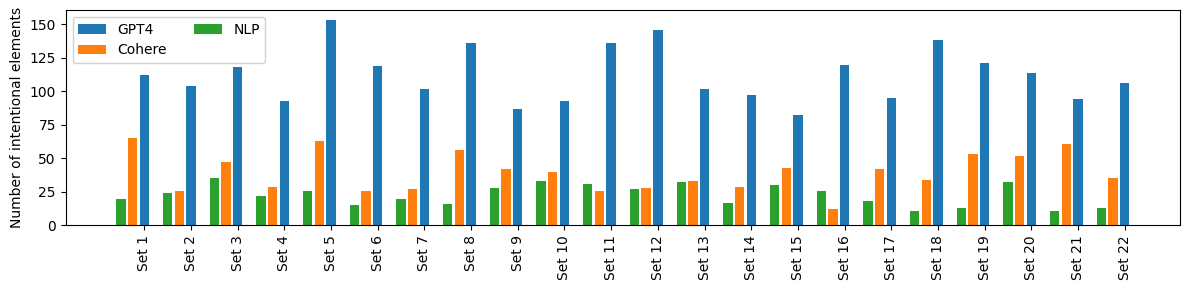

In [4]:
X_axis = np.arange(totalelements_df.shape[0]) 
fig, ax = plt.subplots(figsize=(12, 3))
width = 0.25
multiplier = 0

plt.bar((X_axis - width*multiplier), totalelements_df['intentional elements in GPT LLM'], 0.2, label = 'GPT4') 
#plt.bar(X_axis - 0.24, totalelements_df['intentional elements in llama LLM'], 0.2, label = 'Llama') 

multiplier = 1
plt.bar((X_axis - width*multiplier), totalelements_df['intentional elements in Cohere LLM'], 0.2, label = 'Cohere') 

multiplier = 2
plt.bar((X_axis - width*multiplier ), totalelements_df['intentional elements from NLP Model'], 0.2, label = 'NLP') 
  
plt.xticks(X_axis, totalelements_df['US Set']) 
plt.xlabel("") 
plt.ylabel("Number of intentional elements") 
#plt.title("Comparison of intentional elements identified by LLM vs NLP") 
plt.xticks(rotation=90);
ax.legend(loc='upper left', ncols=2, framealpha=0.9)
plt.tight_layout()
plt.savefig('./elements_llm_vs_nlp.png');

In [5]:
totalelements_df[['intentional elements in GPT LLM', 'intentional elements in Cohere LLM', 'intentional elements from NLP Model']]. describe()



,intentional elements in GPT LLM,intentional elements in Cohere LLM,intentional elements from NLP Model
count,22.000000,22.0000,22.000000
mean,112.181818,39.5000,22.727273
std,19.860553,14.2453,7.740935
min,82.000000,12.0000,11.000000
25%,95.500000,28.2500,16.250000
50%,109.000000,37.5000,23.000000
75%,120.750000,50.7500,29.500000
max,153.000000,65.0000,35.000000


<h1>2. Plot of Intentional Elements vs Relationships</h1>

In [6]:
# totalelements_df['Sum_Elements'] = totalelements_df[['Actors', 'Goals', 'Soft Goals',
#        'Tasks', 'Resources']].sum(axis=1)

# totalelements_df['Sum_relationships'] = totalelements_df[['Contribution',	'Decomposition',	'Dependency']].sum(axis=1)

In [7]:
totalelements_df.columns

Index([                        'US Set Name',
                                    'US Set',
           'intentional elements in GPT LLM',
         'intentional elements in llama LLM',
        'intentional elements in Cohere LLM',
       'intentional elements from NLP Model',
                                'Actors_GPT',
                              'Actors_Llama',
                             'Actors_Cohere',
                                 'Goals_GPT',
                               'Goals_Llama',
                              'Goals_Cohere',
                            'Soft Goals GPT',
                          'Soft Goals Llama',
                         'Soft Goals Cohere',
                                 'Tasks_GPT',
                               'Tasks_Llama',
                              'Tasks_Cohere',
                             'Resources_GPT',
                           'Resources_Llama',
                          'Resources_Cohere',
                        'IE Links 

In [8]:


totalelements_df['Sum_relationships_GPT'] = totalelements_df[['IE Links Goals GPT', 'IE Links Soft Goals GPT', 'IE Links Tasks GPT', 
                                                              'Contribution_GPT',	'Decomposition GPT',	'Dependency GPT']].sum(axis=1)

totalelements_df['Sum_relationships_Llama'] = totalelements_df[['IE Links Goals Llama', 'IE Links Soft Goals Llama', 'IE Links Tasks Llama', 
                                                              'Contribution_Llama',	'Decomposition Llama',	'Dependency Llama']].sum(axis=1)


totalelements_df['Sum_relationships_Cohere'] = totalelements_df[['IE Links Goals Cohere', 'IE Links Soft Goals Cohere', 'IE Links Tasks Cohere', 
                                                                 'Contribution_Cohere',	'Decomposition Cohere',	'Dependency Cohere']].sum(axis=1)								


In [9]:
# make up some fake data
Sum_Elements_GPT = np.array(totalelements_df['intentional elements in GPT LLM'])
Sum_relationships_GPT = np.array(totalelements_df['Sum_relationships_GPT'])
Sum_Elements_Llama = np.array(totalelements_df['intentional elements in llama LLM'])
Sum_relationships_Llama = np.array(totalelements_df['Sum_relationships_Llama'])
Sum_Elements_Cohere = np.array(totalelements_df['intentional elements in Cohere LLM'])
Sum_relationships_Cohere = np.array(totalelements_df['Sum_relationships_Cohere'])


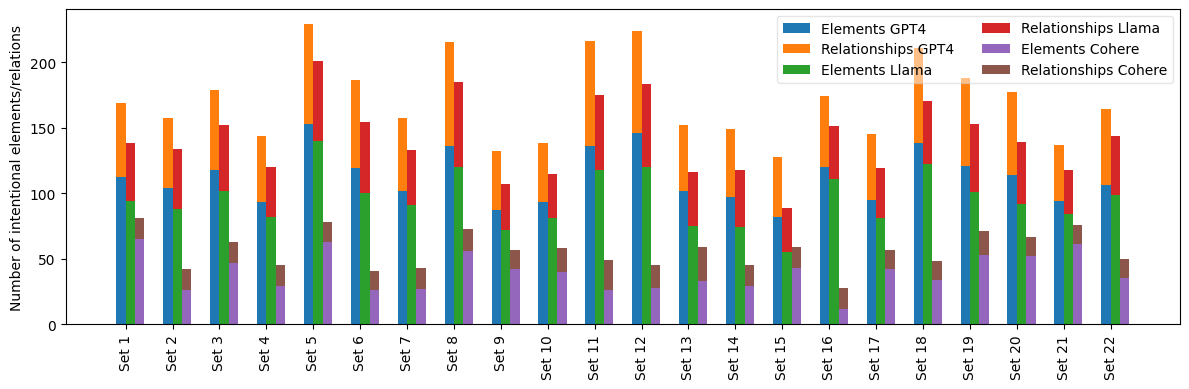

In [10]:
import numpy as np
import matplotlib

# Assuming totalelements_df is already defined with the required columns
species = np.arange(len([f'Set {i+1}' for i in range(0, 22)]))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']

weight_counts = {
    "Elements GPT4": np.array(totalelements_df['intentional elements in GPT LLM']),
    "Relationships GPT4": np.array(totalelements_df['Sum_relationships_GPT']),
    "Elements Llama": np.array(totalelements_df['intentional elements in llama LLM']),
    "Relationships Llama": np.array(totalelements_df['Sum_relationships_Llama']),
    "Elements Cohere": np.array(totalelements_df['intentional elements in Cohere LLM']),
"Relationships Cohere": np.array(totalelements_df['Sum_relationships_Cohere'])
}

width = 0.2  # width of each individual bar within the group
fig, ax = plt.subplots(figsize=(12, 4))

# Define the number of categories per group
n_categories = 3  # e.g., GPT vs Llama vs Cohere
n_bars_per_category = len(weight_counts) // n_categories

j = 0

#colors = [plt.cm.get_cmap('cividis')(i) for i in np.linspace(0, 1, 132)]

# old way: 
#ax.set_prop_cycle('color',matplotlib.colormaps['cividis'](np.linspace(0,1,132)))


# Iterate over each category and plot stacked bars
for i, (category, counts) in enumerate(weight_counts.items()):
    # Determine the x-offset for each group (based on category)
    group_offset = (j // n_bars_per_category) * width * (n_bars_per_category)
    x_offset = (j % n_bars_per_category) * width + group_offset

    # Determine the base height for stacking
    if i % n_bars_per_category == 0:
        bottom = np.zeros(len(species))

    
    # Plot the bars
    ax.bar(species + x_offset, counts, width, label=category, bottom=bottom)
    bottom += counts  # Update bottom for the next stack in the current group
    
    if i==1 or i==3:
        
        j +=1 
        bottom = np.zeros(len(species))
    
# Set up labels and formatting
#ax.set_title("Grouped Stacked Bar Chart of Elements and Relationships")
ax.legend(loc='upper right', ncols=2, framealpha=0.5)
ax.set_xticks(species + width * (n_bars_per_category - 1) / 2, [f'Set {i+1}' for i in range(0, 22)])
plt.ylabel("Number of intentional elements/relations") 
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./elements_vs_relationships.png');

In [11]:
totalelements_df[['intentional elements in GPT LLM', 'Sum_relationships_GPT', 
                 'intentional elements in llama LLM', 'Sum_relationships_Llama', 
                 'intentional elements in Cohere LLM','Sum_relationships_Cohere']]


,intentional elements in GPT LLM,Sum_relationships_GPT,intentional elements in llama LLM,Sum_relationships_Llama,intentional elements in Cohere LLM,Sum_relationships_Cohere
0,112,57,94,44,65,16
1,104,53,88,46,26,16
2,118,61,102,50,47,16
3,93,51,82,38,29,16
4,153,76,140,61,63,15
5,119,67,100,54,26,15
6,102,55,91,42,27,16
7,136,79,120,65,56,17
8,87,45,72,35,42,15
9,93,45,81,34,40,18


In [12]:



category_names = ['Elements', 'Relationships']
# results = {
#     'Question 1': [10, 15],
#     'Question 2': [26, 22],
#     'Question 3': [35, 37],
#     'Question 4': [32, 11],
#     'Question 5': [21, 29],
#     'Question 6': [8, 19]
# }

results ={}

for _, row in totalelements_df.iterrows():
    results[row['US Set']]= [row['Sum_Elements_GPT'], row['Sum_relationships_GPT']]


def survey(results, category_names, cmap):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap(cmap)(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    plt.tight_layout()
    return fig, ax


survey(results, category_names, 'cividis')
# plt.savefig('./elements_vs_relationships.png');

KeyError: 'Sum_Elements_GPT'

<h1>Plot of Syntactic Evaluation-GPT</h1>

In [ ]:
file_name = "evaluationreport_all_llms.xlsx" # path to file + file name
sheet =  "grammarresults GPT" # sheet name or sheet number or list of sheet numbers and names

df2 = pd.read_excel(file_name, sheet_name=sheet)
grammarresults_df = df2.set_index('US/ Criteria').T
print(grammarresults_df.shape)  # print first 5 rows of the dataframe

In [ ]:
grammarresults_df.columns

In [ ]:
grammarresults_df.head()

In [ ]:
"""duplicate names of intentional elements: In the output enclosed using triple back ticks, do you see duplicate values in sections-
'Actors', 'Soft Goals', 'Goals', 'Tasks for Goals', and 'Tasks for Soft Goals'? Answer using yes or no only. Do not include any explanation."""
def C1_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""empty intentional element: In the output enclosed using triple back ticks, do you see empty string as a value in sections-
'Actors', 'Soft Goals', 'Goals', 'Tasks for Goals', and 'Tasks for Soft Goals'? Answer using yes or no only. Do not include any explanation."""
def C2_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""empty goal model: Is the output enclosed using triple back ticks empty? Answer yes or no only. Do not include any explanation."""
def C3_Pass(row):
    if row  == "Yes": return "Fail"
    elif row  == "No": return "Pass"
    elif row == "Not Applicable": return "Pass"
    


"""actors section found in the model: Does the output have a section with title 'actors'? Yes or No?"""
def C4_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    


"""actors used in links: In the output enclosed using triple back ticks, do you see an actor mentioned in the section 'actors' used as a source or destination 
within the section named 'Decompositions Links' or 'Contributions Links'? Answer yes or no only. Do not include any explanation."""
def C5_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""section for linked actors and intentional elements found in the model: Does the output enclosed using triple back ticks, have the following sections with titles- 
'IE Links for Goals', 'IE Links for Tasks of Soft Goals', 'IE Links for Tasks of Goals', 'IE Links for Tasks of Soft Goals'?
Answer using yes or no only? Do not include any explanation."""
def C6_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"



"""intentional elements associated with actors_goals: In the output enclosed using triple back ticks, is every element in the section-'Goals' that is not present in the section name 
'IE Links for Goals'? Answer Yes or No? Do not include any explanation."""
def C7_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    elif row == "Not Applicable": return "Pass"
    


"""intentional elements associated with actors_softgoals: In the output enclosed using triple back ticks, is every element in the section-'Soft Goals' that is not present in the section name 
'IE Links for Tasks of Soft Goals'? Answer Yes or No? Do not include any explanation."""
def C8_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""intentional elements associated with actors_taskgoals: In the output enclosed using triple back ticks, is every element in the section-'Tasks of Goals'  that is not present in the section name 
'IE Links for Tasks of Goals'? Answer Yes or No? Do not include any explanation."""
def C9_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""intentional elements associated with actors_tasksoftgoals: In the output enclosed using triple back ticks, is there any 
element in the section-'Tasks of Soft Goals' that is not present in the section name 
'IE Links for Tasks of Soft Goals'? Answer Yes or No? Do not include any explanation."""
def C10_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""multiple actors for one intentional element: In the output enclosed using triple back ticks, is there atleast one entry in the following sections-
following sections with titles- 'IE Links for Goals', 'IE Links for Tasks of Soft Goals', 
'IE Links for Tasks of Goals', 'IE Links for Tasks of Soft Goals' that is associated with multiple actors? Answer Yes or No? Do not include any explanation."""
def C11_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""intentional element category: In the output enclosed using triple back ticks, 
do you see any section other than the following- 'Tasks for Goals', 'Tasks for Soft Goals', 'Goals', 'Soft Goals', 'Actors', 
'Contribution Links', 'Decomposition Links', 'IE Links for Goals', 'IE Links for Tasks of Soft Goals',  
'IE Links for Tasks of Goals', and 'IE Links for Tasks of Soft Goals'?
 Answer yes or no only. Do not include any explanation."""
def C12_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""contribution link validation: In the output enclosed using triple back ticks, if you see a section with name 'Contribution Links', are the values for 
source and destination, different? Answer Yes, or No if section 
'Contribution Links' is present. Otherwise answer Not Applicable. Do not include any explanation."""
def C13_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    elif row == "Not Applicable": return "Pass"


"""contribution link without source: In the output enclosed using triple back ticks, if you see a section with name 'Contribution Links', is the 
source empty string? Answer yes or no only. Do not include any explanation."""
def C14_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""contribution link without destination: In the output enclosed using triple back ticks, if you see a element with name 'Contribution Links', is the value for 
destination empty string? Answer yes or no only. Do not include any explanation."""
def C15_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""contribution type category: In the output enclosed using triple back ticks, under the section 'Contribution Links', is the contribution type
one of the following values- Make, Help, Break, Hurt? Answer 
Yes, or No if element with name 'contribution' is present. Otherwise answer Not Applicable. Do not include any explanation."""
def C16_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    


"""intentional element default decomposition type: In the output enclosed using triple back ticks, under the section 'Decomposition Links' do you see any decomposition 
type' other than other than the following values - AND, OR, XOR? Answer yes or no only. 
Do not include any explanation."""
def C17_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""decomposition link validation: In the output enclosed using triple back ticks, if you see a section with name 'Decomposition Links', are the values for 
source and destination different? Answer Yes, or No if element with name 'decomposition' if present. Otherwise answer Not Applicable. Do not include any 
explanation."""
def C18_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    



"""decomposition link without source: In the output enclosed using triple back ticks, if you see a section with name 'Decomposition Links', is the value for 
source empty string, or is the 'source missing? Answer yes or no only. Do not include any explanation."""
def C19_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""decomposition link without destination: In the output enclosed using triple back ticks, if you see an element with name 'Decomposition Links', is the value for 
destination empty string, or is the destination missing? Answer yes or no only. Do not include any explanation."""
def C20_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    

In [ ]:
grammarresults_df["C1_Grade"] = grammarresults_df["C1"].apply(C1_Pass)
grammarresults_df["C2_Grade"] = grammarresults_df["C2"].apply(C2_Pass)
grammarresults_df["C3_Grade"] = grammarresults_df["C3"].apply(C3_Pass)
grammarresults_df["C4_Grade"] = grammarresults_df["C4"].apply(C4_Pass)
grammarresults_df["C5_Grade"] = grammarresults_df["C5"].apply(C5_Pass)
grammarresults_df["C6_Grade"] = grammarresults_df["C6"].apply(C6_Pass)
grammarresults_df["C7_Grade"] = grammarresults_df["C7"].apply(C7_Pass)
grammarresults_df["C8_Grade"] = grammarresults_df["C8"].apply(C8_Pass)
grammarresults_df["C9_Grade"] = grammarresults_df["C9"].apply(C9_Pass)
grammarresults_df["C10_Grade"] = grammarresults_df["C10"].apply(C1_Pass)

grammarresults_df["C11_Grade"] = grammarresults_df["C11"].apply(C11_Pass)
grammarresults_df["C12_Grade"] = grammarresults_df["C12"].apply(C12_Pass)
grammarresults_df["C13_Grade"] = grammarresults_df["C13"].apply(C13_Pass)
grammarresults_df["C14_Grade"] = grammarresults_df["C14"].apply(C14_Pass)
grammarresults_df["C15_Grade"] = grammarresults_df["C15"].apply(C15_Pass)
grammarresults_df["C16_Grade"] = grammarresults_df["C16"].apply(C16_Pass)
grammarresults_df["C17_Grade"] = grammarresults_df["C17"].apply(C17_Pass)
grammarresults_df["C18_Grade"] = grammarresults_df["C18"].apply(C18_Pass)
grammarresults_df["C19_Grade"] = grammarresults_df["C19"].apply(C19_Pass)
grammarresults_df["C20_Grade"] = grammarresults_df["C20"].apply(C20_Pass)

In [ ]:
grammarresults_df.drop(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20'], inplace=True)

grammarresults_df.columns

In [ ]:

# figure(figsize=(14, 4))

# grammarresults_df.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
#        'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20']
# df1 = grammarresults_df.melt(var_name='Criteria', value_name='Result')


# plot = sns.countplot(x='Criteria', hue='Result', data=df1, palette=['green',"red"])
# plot.set_title("Syntactic Evaluation of goal models by GPT4")
# plot.set(xlabel="", ylabel="number of user stories")
# plt.legend(loc='upper left', ncols=2)
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.savefig('GPTsyntactic_results.png');

In [ ]:
"""C5  - Is an Actor used in Decomposition Links and Contribution Links?
C7  - Is there a Goal that is not connected to an actor?
C8  - Is there a Soft Goal that is not connected to an actor?
C9  - Is there a Task(associated to a Goal) that is not connected to an actor?
C10 - Is there a Task(associated to a Soft Goal) that is not connected to an actor?
C11 - Associating one IE to multiple actors
"""

<h1>Plot of Syntactic Evaluation-Llama</h1>

In [71]:
%reset -f

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [73]:
file_name = "evaluationreport_all_llms.xlsx" # path to file + file name
sheet =  "grammarresults GPT" # sheet name or sheet number or list of sheet numbers and names

df2 = pd.read_excel(file_name, sheet_name=sheet)
gpt_grammarresults_df = df2.set_index('US/ Criteria').T
print(gpt_grammarresults_df.shape)  # print first 5 rows of the dataframe



############################################################################################################

file_name = "evaluationreport_all_llms.xlsx" # path to file + file name
sheet =  "grammarresults llama" # sheet name or sheet number or list of sheet numbers and names

df2 = pd.read_excel(file_name, sheet_name=sheet)
llama_grammarresults_df = df2.set_index('US/ Criteria').T
print(llama_grammarresults_df.shape)  # print first 5 rows of the dataframe



############################################################################################################
file_name = "evaluationreport_all_llms.xlsx" # path to file + file name
sheet =  "grammarresults cohere" # sheet name or sheet number or list of sheet numbers and names

df2 = pd.read_excel(file_name, sheet_name=sheet)
cohere_grammarresults_df = df2.set_index('US/ Criteria').T
print(cohere_grammarresults_df.shape)  # print first 5 rows of the dataframe

(22, 20)
(22, 20)
(22, 20)


In [74]:
"""duplicate names of intentional elements: In the output enclosed using triple back ticks, do you see duplicate values in sections-
'Actors', 'Soft Goals', 'Goals', 'Tasks for Goals', and 'Tasks for Soft Goals'? Answer using yes or no only. Do not include any explanation."""
def C1_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""empty intentional element: In the output enclosed using triple back ticks, do you see empty string as a value in sections-
'Actors', 'Soft Goals', 'Goals', 'Tasks for Goals', and 'Tasks for Soft Goals'? Answer using yes or no only. Do not include any explanation."""
def C2_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""empty goal model: Is the output enclosed using triple back ticks empty? Answer yes or no only. Do not include any explanation."""
def C3_Pass(row):
    if row  == "Yes": return "Fail"
    elif row  == "No": return "Pass"
    elif row == "Not Applicable": return "Pass"
    


"""actors section found in the model: Does the output have a section with title 'actors'? Yes or No?"""
def C4_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    


"""actors used in links: In the output enclosed using triple back ticks, do you see an actor mentioned in the section 'actors' used as a source or destination 
within the section named 'Decompositions Links' or 'Contributions Links'? Answer yes or no only. Do not include any explanation."""
def C5_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""section for linked actors and intentional elements found in the model: Does the output enclosed using triple back ticks, have the following sections with titles- 
'IE Links for Goals', 'IE Links for Tasks of Soft Goals', 'IE Links for Tasks of Goals', 'IE Links for Tasks of Soft Goals'?
Answer using yes or no only? Do not include any explanation."""
def C6_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"



"""intentional elements associated with actors_goals: In the output enclosed using triple back ticks, is every element in the section-'Goals' that is not present in the section name 
'IE Links for Goals'? Answer Yes or No? Do not include any explanation."""
def C7_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    elif row == "Not Applicable": return "Pass"
    


"""intentional elements associated with actors_softgoals: In the output enclosed using triple back ticks, is every element in the section-'Soft Goals' that is not present in the section name 
'IE Links for Tasks of Soft Goals'? Answer Yes or No? Do not include any explanation."""
def C8_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""intentional elements associated with actors_taskgoals: In the output enclosed using triple back ticks, is every element in the section-'Tasks of Goals'  that is not present in the section name 
'IE Links for Tasks of Goals'? Answer Yes or No? Do not include any explanation."""
def C9_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""intentional elements associated with actors_tasksoftgoals: In the output enclosed using triple back ticks, is there any 
element in the section-'Tasks of Soft Goals' that is not present in the section name 
'IE Links for Tasks of Soft Goals'? Answer Yes or No? Do not include any explanation."""
def C10_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""multiple actors for one intentional element: In the output enclosed using triple back ticks, is there atleast one entry in the following sections-
following sections with titles- 'IE Links for Goals', 'IE Links for Tasks of Soft Goals', 
'IE Links for Tasks of Goals', 'IE Links for Tasks of Soft Goals' that is associated with multiple actors? Answer Yes or No? Do not include any explanation."""
def C11_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""intentional element category: In the output enclosed using triple back ticks, 
do you see any section other than the following- 'Tasks for Goals', 'Tasks for Soft Goals', 'Goals', 'Soft Goals', 'Actors', 
'Contribution Links', 'Decomposition Links', 'IE Links for Goals', 'IE Links for Tasks of Soft Goals',  
'IE Links for Tasks of Goals', and 'IE Links for Tasks of Soft Goals'?
 Answer yes or no only. Do not include any explanation."""
def C12_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""contribution link validation: In the output enclosed using triple back ticks, if you see a section with name 'Contribution Links', are the values for 
source and destination, different? Answer Yes, or No if section 
'Contribution Links' is present. Otherwise answer Not Applicable. Do not include any explanation."""
def C13_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    elif row == "Not Applicable": return "Pass"


"""contribution link without source: In the output enclosed using triple back ticks, if you see a section with name 'Contribution Links', is the 
source empty string? Answer yes or no only. Do not include any explanation."""
def C14_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"



"""contribution link without destination: In the output enclosed using triple back ticks, if you see a element with name 'Contribution Links', is the value for 
destination empty string? Answer yes or no only. Do not include any explanation."""
def C15_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""contribution type category: In the output enclosed using triple back ticks, under the section 'Contribution Links', is the contribution type
one of the following values- Make, Help, Break, Hurt? Answer 
Yes, or No if element with name 'contribution' is present. Otherwise answer Not Applicable. Do not include any explanation."""
def C16_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    


"""intentional element default decomposition type: In the output enclosed using triple back ticks, under the section 'Decomposition Links' do you see any decomposition 
type' other than other than the following values - AND, OR, XOR? Answer yes or no only. 
Do not include any explanation."""
def C17_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""decomposition link validation: In the output enclosed using triple back ticks, if you see a section with name 'Decomposition Links', are the values for 
source and destination different? Answer Yes, or No if element with name 'decomposition' if present. Otherwise answer Not Applicable. Do not include any 
explanation."""
def C18_Pass(row):
    if row == "Yes": return "Pass"
    elif row == "No": return "Fail"
    



"""decomposition link without source: In the output enclosed using triple back ticks, if you see a section with name 'Decomposition Links', is the value for 
source empty string, or is the 'source missing? Answer yes or no only. Do not include any explanation."""
def C19_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"
    


"""decomposition link without destination: In the output enclosed using triple back ticks, if you see an element with name 'Decomposition Links', is the value for 
destination empty string, or is the destination missing? Answer yes or no only. Do not include any explanation."""
def C20_Pass(row):
    if row == "Yes": return "Fail"
    elif row == "No": return "Pass"


llama_grammarresults_df["C1_Grade"] = llama_grammarresults_df["C1"].apply(C1_Pass)
llama_grammarresults_df["C2_Grade"] = llama_grammarresults_df["C2"].apply(C2_Pass)
llama_grammarresults_df["C3_Grade"] = llama_grammarresults_df["C3"].apply(C3_Pass)
llama_grammarresults_df["C4_Grade"] = llama_grammarresults_df["C4"].apply(C4_Pass)
llama_grammarresults_df["C5_Grade"] = llama_grammarresults_df["C5"].apply(C5_Pass)
llama_grammarresults_df["C6_Grade"] = llama_grammarresults_df["C6"].apply(C6_Pass)
llama_grammarresults_df["C7_Grade"] = llama_grammarresults_df["C7"].apply(C7_Pass)
llama_grammarresults_df["C8_Grade"] = llama_grammarresults_df["C8"].apply(C8_Pass)
llama_grammarresults_df["C9_Grade"] = llama_grammarresults_df["C9"].apply(C9_Pass)
llama_grammarresults_df["C10_Grade"] = llama_grammarresults_df["C10"].apply(C1_Pass)
llama_grammarresults_df["C11_Grade"] = llama_grammarresults_df["C11"].apply(C11_Pass)
llama_grammarresults_df["C12_Grade"] = llama_grammarresults_df["C12"].apply(C12_Pass)
llama_grammarresults_df["C13_Grade"] = llama_grammarresults_df["C13"].apply(C13_Pass)
llama_grammarresults_df["C14_Grade"] = llama_grammarresults_df["C14"].apply(C14_Pass)
llama_grammarresults_df["C15_Grade"] = llama_grammarresults_df["C15"].apply(C15_Pass)
llama_grammarresults_df["C16_Grade"] = llama_grammarresults_df["C16"].apply(C16_Pass)
llama_grammarresults_df["C17_Grade"] = llama_grammarresults_df["C17"].apply(C17_Pass)
llama_grammarresults_df["C18_Grade"] = llama_grammarresults_df["C18"].apply(C18_Pass)
llama_grammarresults_df["C19_Grade"] = llama_grammarresults_df["C19"].apply(C19_Pass)
llama_grammarresults_df["C20_Grade"] = llama_grammarresults_df["C20"].apply(C20_Pass)



gpt_grammarresults_df["C1_Grade"] = gpt_grammarresults_df["C1"].apply(C1_Pass)
gpt_grammarresults_df["C2_Grade"] = gpt_grammarresults_df["C2"].apply(C2_Pass)
gpt_grammarresults_df["C3_Grade"] = gpt_grammarresults_df["C3"].apply(C3_Pass)
gpt_grammarresults_df["C4_Grade"] = gpt_grammarresults_df["C4"].apply(C4_Pass)
gpt_grammarresults_df["C5_Grade"] = gpt_grammarresults_df["C5"].apply(C5_Pass)
gpt_grammarresults_df["C6_Grade"] = gpt_grammarresults_df["C6"].apply(C6_Pass)
gpt_grammarresults_df["C7_Grade"] = gpt_grammarresults_df["C7"].apply(C7_Pass)
gpt_grammarresults_df["C8_Grade"] = gpt_grammarresults_df["C8"].apply(C8_Pass)
gpt_grammarresults_df["C9_Grade"] = gpt_grammarresults_df["C9"].apply(C9_Pass)
gpt_grammarresults_df["C10_Grade"] = gpt_grammarresults_df["C10"].apply(C1_Pass)
gpt_grammarresults_df["C11_Grade"] = gpt_grammarresults_df["C11"].apply(C11_Pass)
gpt_grammarresults_df["C12_Grade"] = gpt_grammarresults_df["C12"].apply(C12_Pass)
gpt_grammarresults_df["C13_Grade"] = gpt_grammarresults_df["C13"].apply(C13_Pass)
gpt_grammarresults_df["C14_Grade"] = gpt_grammarresults_df["C14"].apply(C14_Pass)
gpt_grammarresults_df["C15_Grade"] = gpt_grammarresults_df["C15"].apply(C15_Pass)
gpt_grammarresults_df["C16_Grade"] = gpt_grammarresults_df["C16"].apply(C16_Pass)
gpt_grammarresults_df["C17_Grade"] = gpt_grammarresults_df["C17"].apply(C17_Pass)
gpt_grammarresults_df["C18_Grade"] = gpt_grammarresults_df["C18"].apply(C18_Pass)
gpt_grammarresults_df["C19_Grade"] = gpt_grammarresults_df["C19"].apply(C19_Pass)
gpt_grammarresults_df["C20_Grade"] = gpt_grammarresults_df["C20"].apply(C20_Pass)



cohere_grammarresults_df["C1_Grade"] = cohere_grammarresults_df["C1"].apply(C1_Pass)
cohere_grammarresults_df["C2_Grade"] = cohere_grammarresults_df["C2"].apply(C2_Pass)
cohere_grammarresults_df["C3_Grade"] = cohere_grammarresults_df["C3"].apply(C3_Pass)
cohere_grammarresults_df["C4_Grade"] = cohere_grammarresults_df["C4"].apply(C4_Pass)
cohere_grammarresults_df["C5_Grade"] = cohere_grammarresults_df["C5"].apply(C5_Pass)
cohere_grammarresults_df["C6_Grade"] = cohere_grammarresults_df["C6"].apply(C6_Pass)
cohere_grammarresults_df["C7_Grade"] = cohere_grammarresults_df["C7"].apply(C7_Pass)
cohere_grammarresults_df["C8_Grade"] = cohere_grammarresults_df["C8"].apply(C8_Pass)
cohere_grammarresults_df["C9_Grade"] = cohere_grammarresults_df["C9"].apply(C9_Pass)
cohere_grammarresults_df["C10_Grade"] = cohere_grammarresults_df["C10"].apply(C1_Pass)
cohere_grammarresults_df["C11_Grade"] = cohere_grammarresults_df["C11"].apply(C11_Pass)
cohere_grammarresults_df["C12_Grade"] = cohere_grammarresults_df["C12"].apply(C12_Pass)
cohere_grammarresults_df["C13_Grade"] = cohere_grammarresults_df["C13"].apply(C13_Pass)
cohere_grammarresults_df["C14_Grade"] = cohere_grammarresults_df["C14"].apply(C14_Pass)
cohere_grammarresults_df["C15_Grade"] = cohere_grammarresults_df["C15"].apply(C15_Pass)
cohere_grammarresults_df["C16_Grade"] = cohere_grammarresults_df["C16"].apply(C16_Pass)
cohere_grammarresults_df["C17_Grade"] = cohere_grammarresults_df["C17"].apply(C17_Pass)
cohere_grammarresults_df["C18_Grade"] = cohere_grammarresults_df["C18"].apply(C18_Pass)
cohere_grammarresults_df["C19_Grade"] = cohere_grammarresults_df["C19"].apply(C19_Pass)
cohere_grammarresults_df["C20_Grade"] = cohere_grammarresults_df["C20"].apply(C20_Pass)

In [75]:
llama_grammarresults_df.drop(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20'], inplace=True)

llama_grammarresults_df.columns

gpt_grammarresults_df.drop(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20'], inplace=True)

gpt_grammarresults_df.columns

cohere_grammarresults_df.drop(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20'], inplace=True)

cohere_grammarresults_df.columns

Index(['C1_Grade', 'C2_Grade', 'C3_Grade', 'C4_Grade', 'C5_Grade', 'C6_Grade',
       'C7_Grade', 'C8_Grade', 'C9_Grade', 'C10_Grade', 'C11_Grade',
       'C12_Grade', 'C13_Grade', 'C14_Grade', 'C15_Grade', 'C16_Grade',
       'C17_Grade', 'C18_Grade', 'C19_Grade', 'C20_Grade'],
      dtype='object', name='US/ Criteria')

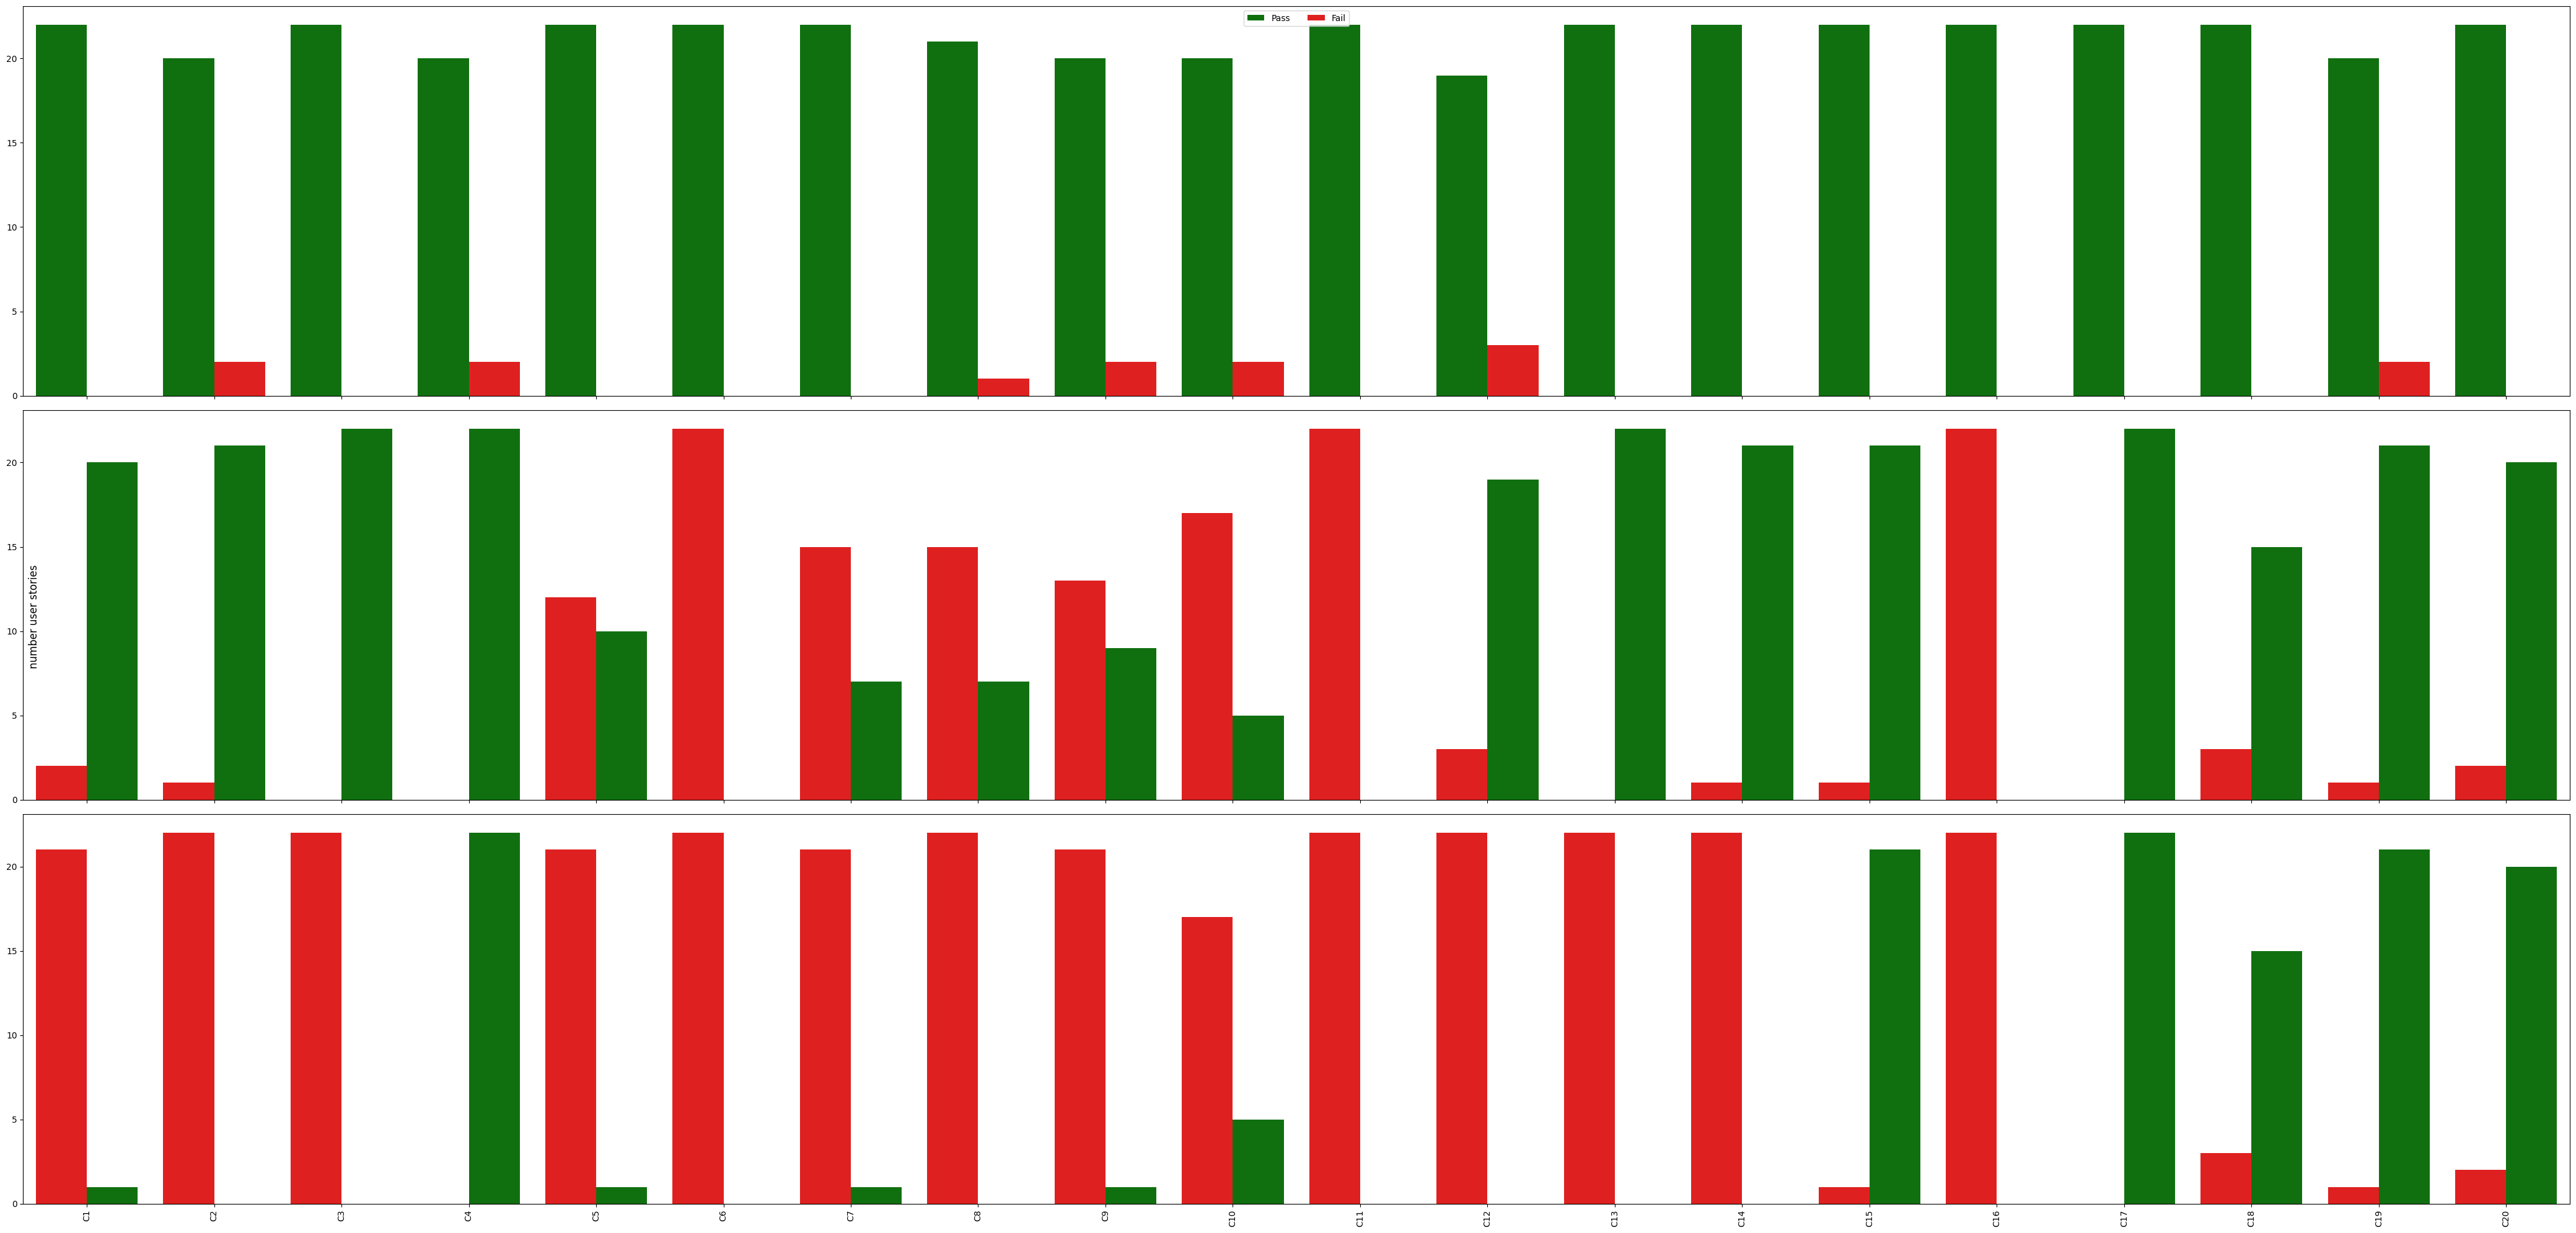

In [76]:
f, axes = plt.subplots(3, 1, sharex='col', sharey='row', squeeze=True,  figsize=(42, 20))
# figure(figsize=(14, 4))

gpt_grammarresults_df.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20']
dfmelt_gpt = gpt_grammarresults_df.melt(var_name='Criteria', value_name='Result')


llama_grammarresults_df.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20']
dfmelt_llama = llama_grammarresults_df.melt(var_name='Criteria', value_name='Result')


cohere_grammarresults_df.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20']
dfmelt_cohere = cohere_grammarresults_df.melt(var_name='Criteria', value_name='Result')


plot1 = sns.countplot(x='Criteria', hue='Result', data=dfmelt_gpt, palette=['green',"red"],  ax=axes[0])
plot2 = sns.countplot(x='Criteria', hue='Result', data=dfmelt_llama, palette=['red',"green"],  ax=axes[1])
plot3 = sns.countplot(x='Criteria', hue='Result', data=dfmelt_cohere, palette=['red',"green"],  ax=axes[2])

#Syntactic Evaluation of goal models by GPT4
axes[0].set_title("")
axes[1].set_title("")
axes[2].set_title("")

axes[0].legend(loc='upper center', ncols=2)
axes[1].get_legend().remove()
axes[2].get_legend().remove()

axes[0].set(xlabel="", ylabel="")
axes[1].set(xlabel="", ylabel="")
axes[2].set(xlabel="", ylabel="")

f.supylabel('number user stories')

plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('all_syntactic_results.png');

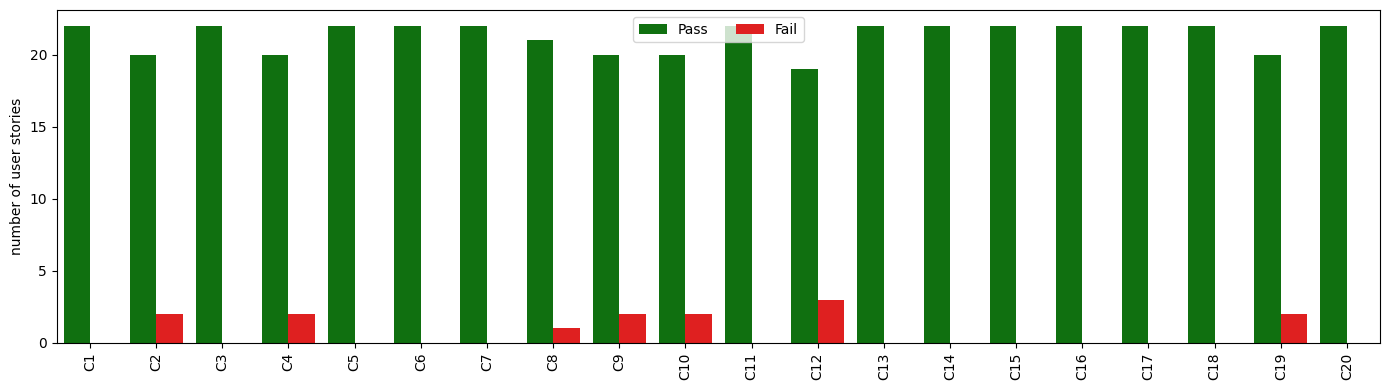

In [77]:
figure(figsize=(14, 4))

plot = sns.countplot(x='Criteria', hue='Result', data=dfmelt_gpt, palette=['green',"red"])
plot.set_title("")
plot.set(xlabel="", ylabel="number of user stories")
plt.legend(loc='upper center', ncols=2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('GPT_syntactic_results.png');

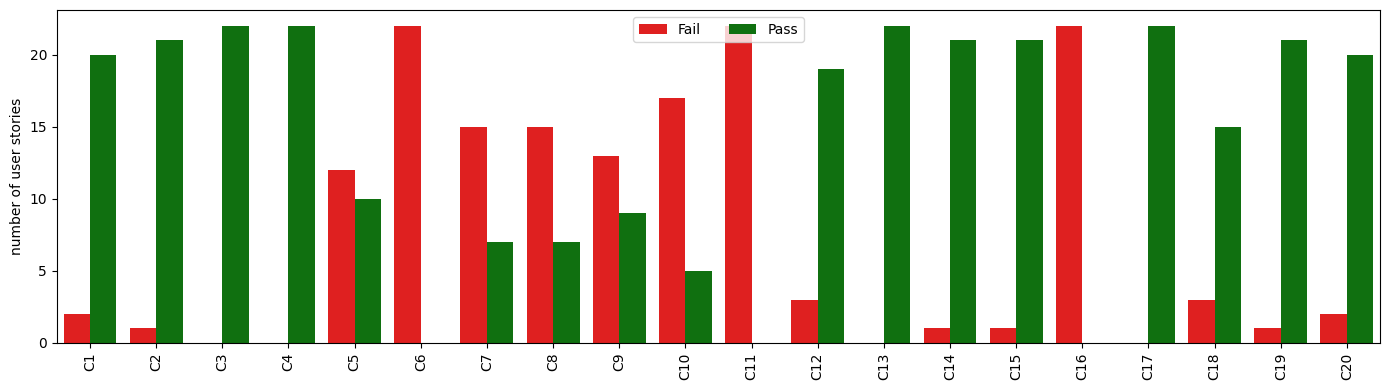

In [78]:
figure(figsize=(14, 4))

plot = sns.countplot(x='Criteria', hue='Result', data=dfmelt_llama, palette=['red',"green"])
plot.set_title("")
plot.set(xlabel="", ylabel="number of user stories")
plt.legend(loc='upper center', ncols=2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('llama_syntactic_results.png');

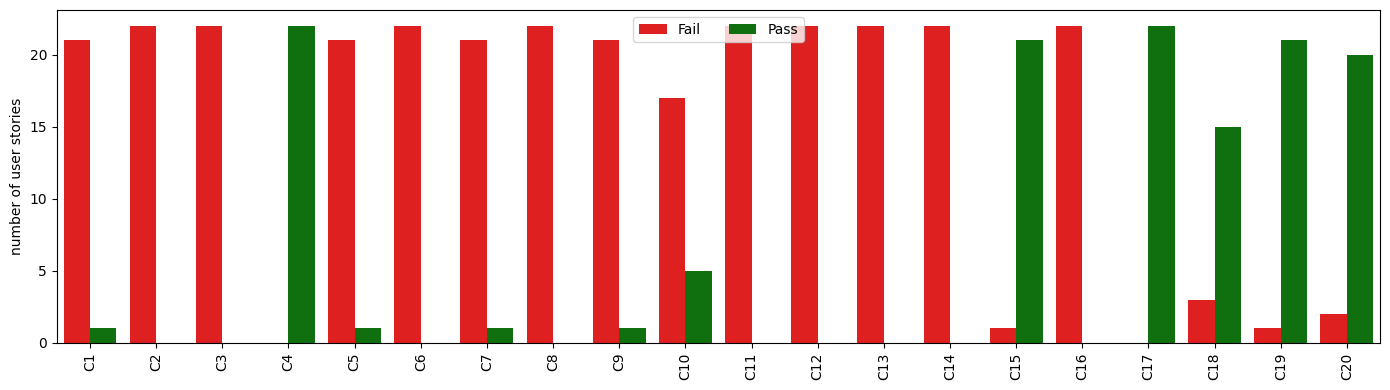

In [79]:
figure(figsize=(14, 4))

plot = sns.countplot(x='Criteria', hue='Result', data=dfmelt_cohere, palette=['red',"green"])
plot.set_title("")
plot.set(xlabel="", ylabel="number of user stories")
plt.legend(loc='upper center', ncols=2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Cohere_syntactic_results.png');